In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv
import numpy as np


DF_1960 = pd.read_csv("Resources/Features_Billboard_1960s.csv")
DF_1970 = pd.read_csv("Resources/Features_Billboard_1970s.csv")
DF_1980 = pd.read_csv("Resources/Features_Billboard_1980s.csv")
DF_1990 = pd.read_csv("Resources/Features_Billboard_1990s.csv")
DF_2000 = pd.read_csv("Resources/Features_Billboard_2000s.csv")
DF_2010 = pd.read_csv("Resources/Features_Billboard_2010s.csv")

Other_df = pd.read_csv("Resources/Top100Not1.csv")

Decades_df = pd.read_csv("Resources/Top100Not1_withDecade.csv")



In [9]:
# Drop NaN values in each DF

DF_1960_clean = DF_1960.dropna()
DF_1970_clean = DF_1970.dropna()
DF_1980_clean = DF_1980.dropna()
DF_1990_clean = DF_1990.dropna()
DF_2000_clean = DF_2000.dropna()
DF_2010_clean = DF_2010.dropna()



In [10]:
# Combine all the dataframes

frames = [DF_1960_clean, DF_1970_clean, DF_1980_clean, DF_1990_clean, DF_2000_clean, DF_2010_clean]

Billboard_df = pd.concat(frames)

Billboard_df.head()



,Artist,Song,WeeksAtNumberOne,Song ID,Song Popularity,Acousticness,Danceability,Energy,Liveness,Speechiness,Valence,Tempo,Instrumentalness,Loudness
0,The Rolling Stones,"""(I Can't Get No) Satisfaction""",4,6x7XTxs6pE1OuimqK7JJ7p,34.0,0.0161,0.343,0.974,0.3570,0.0952,0.324,131.177,0.575000,-4.113
1,Otis Redding,"""(Sittin' On) The Dock of the Bay""",4,5iJ82Q8TgyA0i5WGdgnL0A,4.0,0.1400,0.510,0.724,0.1520,0.0328,0.598,105.002,0.879000,-8.367
2,The Righteous Brothers,"""(You're My) Soul And Inspiration""",3,1Mcoepzm9uZ3nayQLy1O7E,0.0,0.3310,0.527,0.566,0.0988,0.0272,0.366,92.070,0.000002,-6.427
3,? & the Mysterians,"""96 Tears""",1,2OFLNihLjoH4pubiYMf4xu,17.0,0.5200,0.608,0.701,0.2130,0.0523,0.898,71.785,0.000253,-8.016
4,Elvis Presley,"""A Big Hunk o' Love""",2,4OXR5PiY95zKeXVLfTUpXD,9.0,0.6480,0.558,0.841,0.2600,0.0478,0.951,87.026,0.470000,-10.891


In [26]:

# Other_df.head()

Other_df['Instrumentalness'].describe()

count    20040.000000
mean         0.200344
std          0.333927
min          0.000000
25%          0.000001
50%          0.000472
75%          0.293000
max          0.996000
Name: Instrumentalness, dtype: float64

In [47]:

# Filter by decade

other_1950_df = Decades_df.loc[Decades_df['Year'] == 1950, :]
other_1960_df = Decades_df.loc[Decades_df['Year'] == 1960, :]
other_1970_df = Decades_df.loc[Decades_df['Year'] == 1970, :]
other_1980_df = Decades_df.loc[Decades_df['Year'] == 1980, :]
other_1990_df = Decades_df.loc[Decades_df['Year'] == 1990, :]
other_2000_df = Decades_df.loc[Decades_df['Year'] == 2000, :]
other_2010_df = Decades_df.loc[Decades_df['Year'] == 2010, :]

# Combine 1950 and 1960s
list1 = [other_1950_df, other_1960_df]

other_1960_df = pd.concat(list1)

other_1960_df.count()

Title               5517
Artist              5517
Peak_Position_x     5517
Song ID             5517
Song Popularity     5517
Acousticness        5517
Danceability        5517
Energy              5517
Liveness            5517
Speechiness         5517
Valence             5517
Tempo               5517
Instrumentalness    5517
Loudness            5517
Date                5517
Year                5517
dtype: int64

Text(0.5,1,'Billboard #1 1960-Current song metrics')

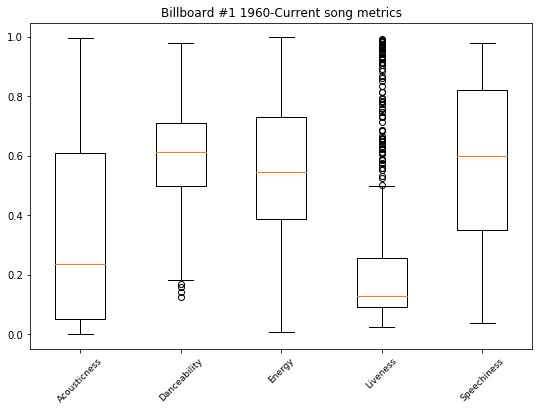

In [11]:
%matplotlib inline

# Full Billboard Boxplot

billbord_data = [Billboard_df['Acousticness'], Billboard_df['Danceability'], Billboard_df['Energy'], Billboard_df['Liveness'],
       Billboard_df['Valence']]

billbord_data2 = [Billboard_df['Speechiness'], Billboard_df['Instrumentalness']]

labels = ['Acousticness', 'Danceability', 'Energy', 'Liveness', 'Speechiness', 'Valence', 'Instrumentalness']



fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(billbord_data)
ax.set_xticklabels(labels, rotation=45, fontsize=9)

plt.title("Billboard #1 1960-Current song metrics")

(-0.1, 1)

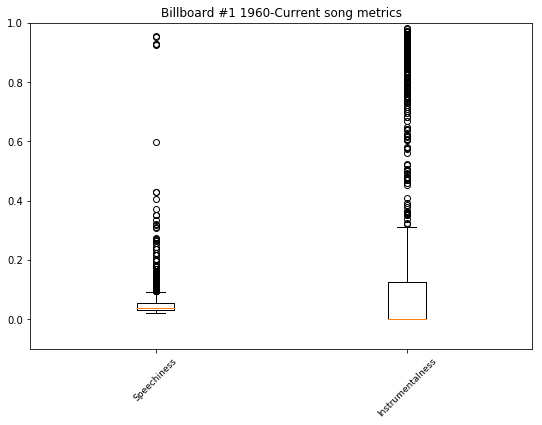

In [12]:
# Full Billboard Boxplot

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(billbord_data2)
ax.set_xticklabels(['Speechiness', 'Instrumentalness'], rotation=45, fontsize=9)

plt.title("Billboard #1 1960-Current song metrics")
plt.ylim(-0.1,1)

Text(0.5,1,'Non #1 Billboard 1960-Current song metrics')

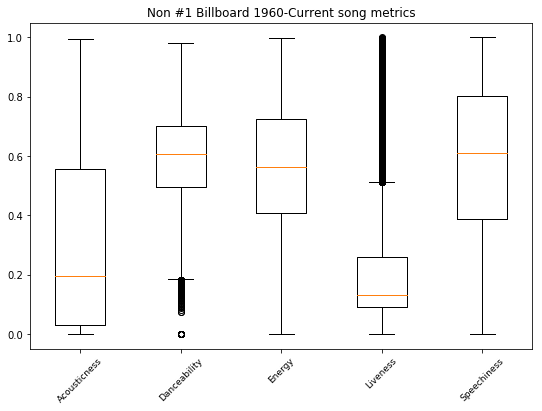

In [5]:


# Other Billboard Boxplot

other_billbord_data = [Other_df['Acousticness'], Other_df['Danceability'], Other_df['Energy'], Other_df['Liveness'],
       Other_df['Valence']]

other_billbord_data2 = [Other_df['Speechiness'], Other_df['Instrumentalness']]

labels = ['Acousticness', 'Danceability', 'Energy', 'Liveness', 'Speechiness', 'Valence', 'Instrumentalness']



fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(other_billbord_data)
ax.set_xticklabels(labels, rotation=45, fontsize=9)

plt.title("Non #1 Billboard 1960-Current song metrics")

(-0.1, 1)

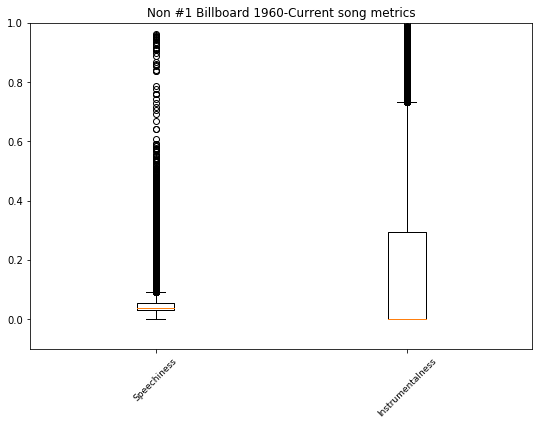

In [6]:

# Other Billboard Boxplot

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(other_billbord_data2)
ax.set_xticklabels(['Speechiness', 'Instrumentalness'], rotation=45, fontsize=9)

plt.title("Non #1 Billboard 1960-Current song metrics")
plt.ylim(-0.1,1)

Text(0.5,1,'Billboard #1 1960s song metrics')

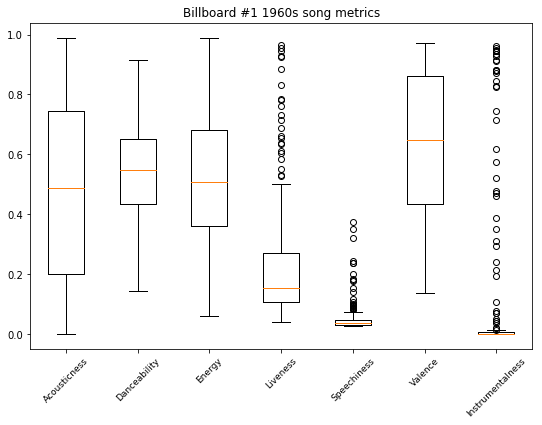

In [25]:
# 1960s Boxplot

data1960 = [DF_1960_clean['Acousticness'], DF_1960_clean['Danceability'], DF_1960_clean['Energy'], DF_1960_clean['Liveness'],
       DF_1960_clean['Speechiness'], DF_1960_clean['Valence'], DF_1960_clean['Instrumentalness']]

labels = ['Acousticness', 'Danceability', 'Energy', 'Liveness', 'Speechiness', 'Valence', 'Instrumentalness']



fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data1960)
ax.set_xticklabels(labels, rotation=45, fontsize=9)

plt.title("Billboard #1 1960s song metrics")

Text(0.5,1,'Non #1 1960s song metrics')

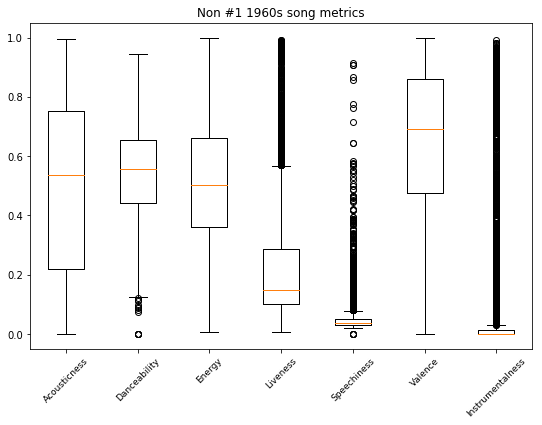

In [48]:
# 1960s non #1 Boxplot

other_1960_data = [other_1960_df['Acousticness'], other_1960_df['Danceability'], other_1960_df['Energy'], other_1960_df['Liveness'],
       other_1960_df['Speechiness'], other_1960_df['Valence'], other_1960_df['Instrumentalness']]

labels = ['Acousticness', 'Danceability', 'Energy', 'Liveness', 'Speechiness', 'Valence', 'Instrumentalness']



fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(other_1960_data)
ax.set_xticklabels(labels, rotation=45, fontsize=9)

plt.title("Non #1 1960s song metrics")



Text(0.5,1,'Billboard #1 1970s song metrics')

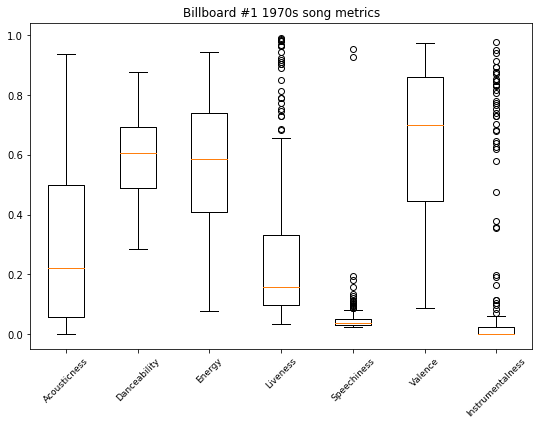

In [24]:
# 1970s Boxplot

data1970 = [DF_1970_clean['Acousticness'], DF_1970_clean['Danceability'], DF_1970_clean['Energy'], DF_1970_clean['Liveness'],
       DF_1970_clean['Speechiness'], DF_1970_clean['Valence'], DF_1970_clean['Instrumentalness']]

labels = ['Acousticness', 'Danceability', 'Energy', 'Liveness', 'Speechiness', 'Valence', 'Instrumentalness']



fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data1970)
ax.set_xticklabels(labels, rotation=45, fontsize=9)

plt.title("Billboard #1 1970s song metrics")

Text(0.5,1,'Non #1 1970s song metrics')

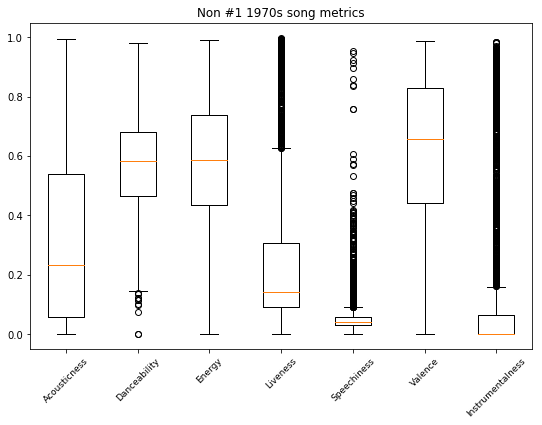

In [50]:
# 1970s non #1 Boxplot

other_1970_data = [other_1970_df['Acousticness'], other_1970_df['Danceability'], other_1970_df['Energy'], other_1970_df['Liveness'],
       other_1970_df['Speechiness'], other_1970_df['Valence'], other_1970_df['Instrumentalness']]

labels = ['Acousticness', 'Danceability', 'Energy', 'Liveness', 'Speechiness', 'Valence', 'Instrumentalness']



fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(other_1970_data)
ax.set_xticklabels(labels, rotation=45, fontsize=9)

plt.title("Non #1 1970s song metrics")


Text(0.5,1,'Billboard 1980s song metrics')

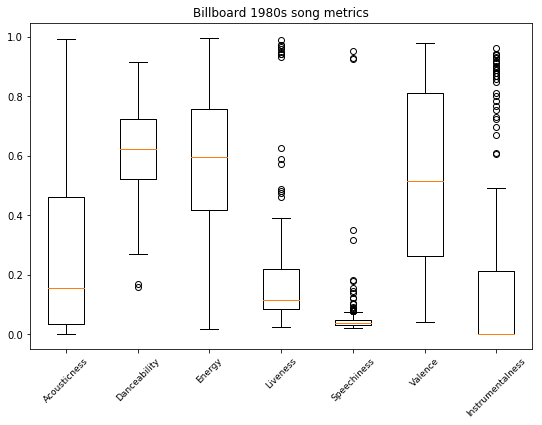

In [119]:
# 1980s Boxplot

data1980 = [DF_1980_clean['Acousticness'], DF_1980_clean['Danceability'], DF_1980_clean['Energy'], DF_1980_clean['Liveness'],
       DF_1980_clean['Speechiness'], DF_1980_clean['Valence'], DF_1980_clean['Instrumentalness']]

labels = ['Acousticness', 'Danceability', 'Energy', 'Liveness', 'Speechiness', 'Valence', 'Instrumentalness']



fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data1980)
ax.set_xticklabels(labels, rotation=45, fontsize=9)

plt.title("Billboard #1 1980s song metrics")

Text(0.5,1,'Non #1 1970s song metrics')

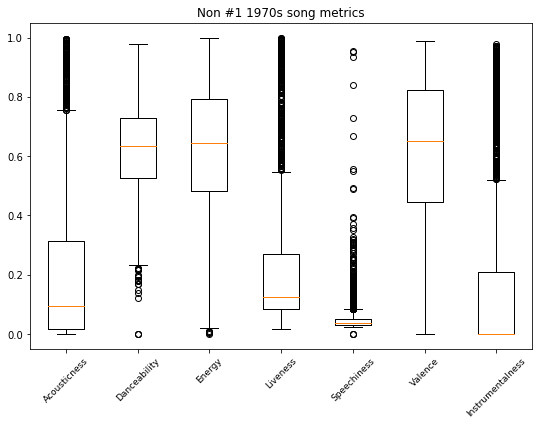

In [51]:
# 1980s non #1 Boxplot

other_1980_data = [other_1980_df['Acousticness'], other_1980_df['Danceability'], other_1980_df['Energy'], other_1980_df['Liveness'],
       other_1980_df['Speechiness'], other_1980_df['Valence'], other_1980_df['Instrumentalness']]

labels = ['Acousticness', 'Danceability', 'Energy', 'Liveness', 'Speechiness', 'Valence', 'Instrumentalness']



fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(other_1980_data)
ax.set_xticklabels(labels, rotation=45, fontsize=9)

plt.title("Non #1 1970s song metrics")

Text(0.5,1,'Billboard #1 1990s song metrics')

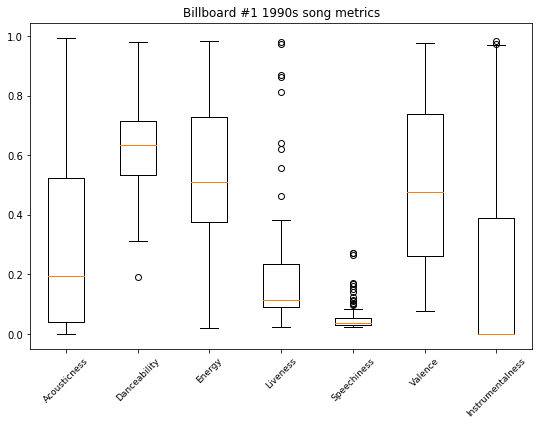

In [121]:
# 1990s Boxplot

data1990 = [DF_1990_clean['Acousticness'], DF_1990_clean['Danceability'], DF_1990_clean['Energy'], DF_1990_clean['Liveness'],
       DF_1990_clean['Speechiness'], DF_1990_clean['Valence'], DF_1990_clean['Instrumentalness']]

labels = ['Acousticness', 'Danceability', 'Energy', 'Liveness', 'Speechiness', 'Valence', 'Instrumentalness']



fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data1990)
ax.set_xticklabels(labels, rotation=45, fontsize=9)

plt.title("Billboard #1 1990s song metrics")

Text(0.5,1,'Non #1 1990s song metrics')

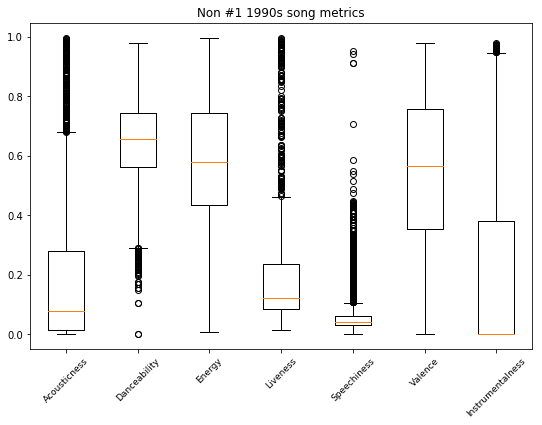

In [52]:
# 1990s non #1 Boxplot

other_1990_data = [other_1990_df['Acousticness'], other_1990_df['Danceability'], other_1990_df['Energy'], other_1990_df['Liveness'],
       other_1990_df['Speechiness'], other_1990_df['Valence'], other_1990_df['Instrumentalness']]

labels = ['Acousticness', 'Danceability', 'Energy', 'Liveness', 'Speechiness', 'Valence', 'Instrumentalness']



fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(other_1990_data)
ax.set_xticklabels(labels, rotation=45, fontsize=9)

plt.title("Non #1 1990s song metrics")

Text(0.5,1,'Billboard #1 2000s song metrics')

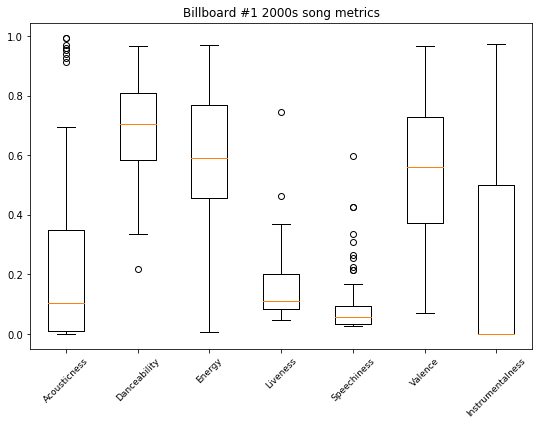

In [126]:
# 2000s Boxplot

data2000 = [DF_2000_clean['Acousticness'], DF_2000_clean['Danceability'], DF_2000_clean['Energy'], DF_2000_clean['Liveness'],
       DF_2000_clean['Speechiness'], DF_2000_clean['Valence'], DF_2000_clean['Instrumentalness']]

labels = ['Acousticness', 'Danceability', 'Energy', 'Liveness', 'Speechiness', 'Valence', 'Instrumentalness']



fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data2000)
ax.set_xticklabels(labels, rotation=45, fontsize=9)

plt.title("Billboard #1 2000s song metrics")

Text(0.5,1,'Non #1 2000s song metrics')

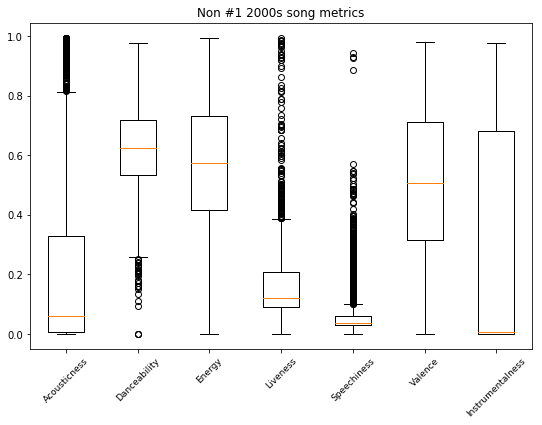

In [54]:
# 2000s non #1 Boxplot

other_2000_data = [other_2000_df['Acousticness'], other_2000_df['Danceability'], other_2000_df['Energy'], other_2000_df['Liveness'],
       other_2000_df['Speechiness'], other_2000_df['Valence'], other_2000_df['Instrumentalness']]

labels = ['Acousticness', 'Danceability', 'Energy', 'Liveness', 'Speechiness', 'Valence', 'Instrumentalness']



fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(other_2000_data)
ax.set_xticklabels(labels, rotation=45, fontsize=9)

plt.title("Non #1 2000s song metrics")

Text(0.5,1,'Billboard #1 2010s song metrics')

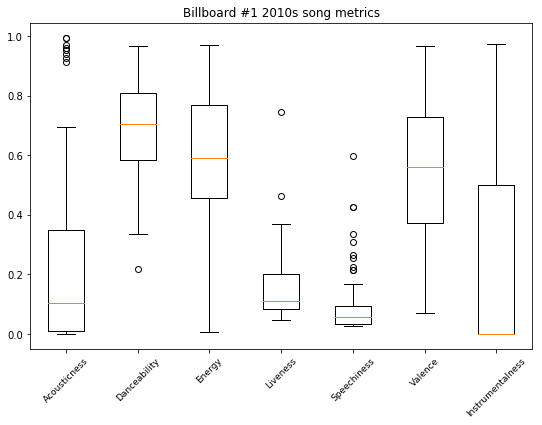

In [127]:
# 2010s Boxplot

data2010 = [DF_2010_clean['Acousticness'], DF_2010_clean['Danceability'], DF_2010_clean['Energy'], DF_2010_clean['Liveness'],
       DF_2010_clean['Speechiness'], DF_2010_clean['Valence'], DF_2010_clean['Instrumentalness']]

labels = ['Acousticness', 'Danceability', 'Energy', 'Liveness', 'Speechiness', 'Valence', 'Instrumentalness']



fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data2000)
ax.set_xticklabels(labels, rotation=45, fontsize=9)

plt.title("Billboard #1 2010s song metrics")

Text(0.5,1,'Non #1 2010s song metrics')

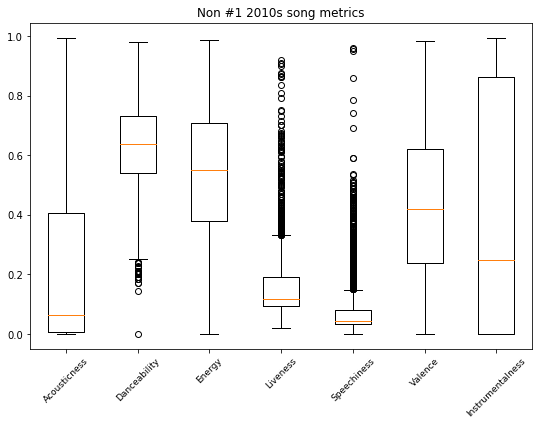

In [55]:
# 2010s non #1 Boxplot

other_2010_data = [other_2010_df['Acousticness'], other_2010_df['Danceability'], other_2010_df['Energy'], other_2010_df['Liveness'],
       other_2010_df['Speechiness'], other_2010_df['Valence'], other_2010_df['Instrumentalness']]

labels = ['Acousticness', 'Danceability', 'Energy', 'Liveness', 'Speechiness', 'Valence', 'Instrumentalness']



fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(other_2010_data)
ax.set_xticklabels(labels, rotation=45, fontsize=9)

plt.title("Non #1 2010s song metrics")


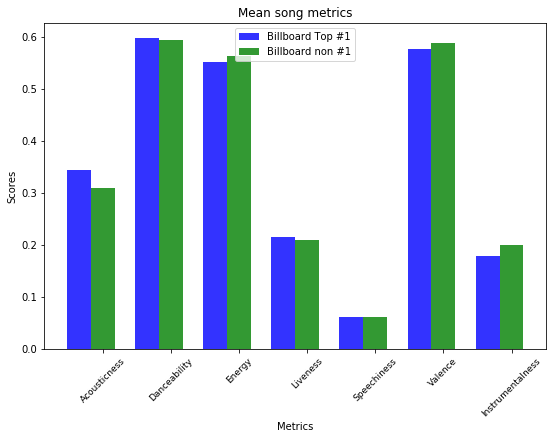

In [14]:
# data_mean1960 = [DF_1960_clean['Acousticness'].mean(), DF_1960_clean['Danceability'].mean(), DF_1960_clean['Energy'].mean(), 
#              DF_1960_clean['Liveness'].mean(),DF_1960_clean['Speechiness'].mean(), DF_1960_clean['Valence'].mean(), 
#              DF_1960_clean['Instrumentalness'].mean()]

# data_mean1970 = [DF_1970_clean['Acousticness'].mean(), DF_1970_clean['Danceability'].mean(), DF_1970_clean['Energy'].mean(), 
#              DF_1970_clean['Liveness'].mean(),DF_1970_clean['Speechiness'].mean(), DF_1970_clean['Valence'].mean(), 
#              DF_1970_clean['Instrumentalness'].mean()]

# data_mean1980 = [DF_1980_clean['Acousticness'].mean(), DF_1980_clean['Danceability'].mean(), DF_1980_clean['Energy'].mean(), 
#              DF_1980_clean['Liveness'].mean(),DF_1980_clean['Speechiness'].mean(), DF_1980_clean['Valence'].mean(), 
#              DF_1980_clean['Instrumentalness'].mean()]

# data_mean1990 = [DF_1990_clean['Acousticness'].mean(), DF_1990_clean['Danceability'].mean(), DF_1990_clean['Energy'].mean(), 
#              DF_1990_clean['Liveness'].mean(),DF_1990_clean['Speechiness'].mean(), DF_1990_clean['Valence'].mean(), 
#              DF_1990_clean['Instrumentalness'].mean()]

# data_mean2000 = [DF_2000_clean['Acousticness'].mean(), DF_2000_clean['Danceability'].mean(), DF_2000_clean['Energy'].mean(), 
#              DF_2000_clean['Liveness'].mean(),DF_2000_clean['Speechiness'].mean(), DF_2000_clean['Valence'].mean(), 
#              DF_2000_clean['Instrumentalness'].mean()]

# data_mean2010 = [DF_2010_clean['Acousticness'].mean(), DF_2010_clean['Danceability'].mean(), DF_2010_clean['Energy'].mean(), 
#              DF_2010_clean['Liveness'].mean(),DF_2010_clean['Speechiness'].mean(), DF_2010_clean['Valence'].mean(), 
#              DF_2010_clean['Instrumentalness'].mean()]




billbord_data_mean = [Billboard_df['Acousticness'].mean(), Billboard_df['Danceability'].mean(), Billboard_df['Energy'].mean(),
                      Billboard_df['Liveness'].mean(), Billboard_df['Speechiness'].mean(), Billboard_df['Valence'].mean(),
                      Billboard_df['Instrumentalness'].mean()]

other_billbord_data_mean = [Other_df['Acousticness'].mean(), Other_df['Danceability'].mean(), Other_df['Energy'].mean(),
                      Other_df['Liveness'].mean(), Other_df['Speechiness'].mean(), Other_df['Valence'].mean(),
                      Other_df['Instrumentalness'].mean()]





fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
index = np.arange(7)
bar_width = 0.35
opacity = 0.8
 
bar1 = plt.bar(index, billbord_data_mean, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Billboard Top #1')
 
bar2 = plt.bar(index + bar_width, other_billbord_data_mean, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Billboard non #1')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Mean song metrics')
plt.xticks(index + bar_width, labels, rotation=45, fontsize=9)
plt.legend()
 

In [17]:
import scipy.stats as stats

group1 = Billboard_df['Acousticness']

group2 = Other_df['Acousticness']


stats.ttest_ind(group1, group2, equal_var=False)


Ttest_indResult(statistic=3.1636387976622844, pvalue=0.0016089135735182477)

In [18]:
group1 = Billboard_df['Danceability']

group2 = Other_df['Danceability']


stats.ttest_ind(group1, group2, equal_var=False)


Ttest_indResult(statistic=0.7090612437506593, pvalue=0.4784640172083714)

In [19]:
group1 = Billboard_df['Energy']

group2 = Other_df['Energy']


stats.ttest_ind(group1, group2, equal_var=False)


Ttest_indResult(statistic=-1.487615926183092, pvalue=0.13719441615137357)

In [20]:

group1 = Billboard_df['Liveness']

group2 = Other_df['Liveness']


stats.ttest_ind(group1, group2, equal_var=False)

Ttest_indResult(statistic=0.78231219754926, pvalue=0.4342324209990389)

In [21]:

group1 = Billboard_df['Speechiness']

group2 = Other_df['Speechiness']


stats.ttest_ind(group1, group2, equal_var=False)

Ttest_indResult(statistic=-0.2121254428648496, pvalue=0.8320566732321443)

In [22]:

group1 = Billboard_df['Valence']

group2 = Other_df['Valence']


stats.ttest_ind(group1, group2, equal_var=False)

Ttest_indResult(statistic=-1.0647448715813204, pvalue=0.2872699182701874)

In [23]:

group1 = Billboard_df['Instrumentalness']

group2 = Other_df['Instrumentalness']


stats.ttest_ind(group1, group2, equal_var=False)

Ttest_indResult(statistic=-1.8618351906316613, pvalue=0.0629399654612918)

In [49]:
metrics_df = pd.DataFrame({'#1 vs Non #1 p-value': [0.0016089135735182477, 0.4784640172083714, 0.13719441615137357,
                                           0.4342324209990389, 0.8320566732321443, 0.2872699182701874,0.0629399654612918]}, index=labels)

metrics_df.head(10)

,#1 vs Non #1 p-value
Acousticness,0.001609
Danceability,0.478464
Energy,0.137194
Liveness,0.434232
Speechiness,0.832057
Valence,0.287270
Instrumentalness,0.062940
